In [1]:
import sys
import os
sys.path.append(os.path.abspath("..")) 

In [74]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

In [2]:
from speclib import misc

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, metrics

%matplotlib inline
plt.style.use('ggplot')
# sns.set(style="white")
mpl.rcParams['figure.figsize'] = [10, 6]

In [4]:
mpl.rcParams['figure.figsize'] = [10, 6] 

In [5]:
# this is our test set, it's just a straight line with some
# Gaussian noise
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.int)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)


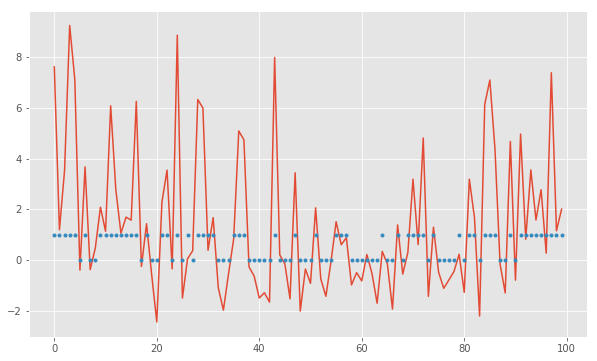

In [6]:
plt.plot(X)
plt.plot(y, '.')

In [7]:
X = X[:, np.newaxis] 

X.shape, y.shape

((100, 1), (100,))

In [8]:
# run the classifier
clf = linear_model.LogisticRegression(C=1e5, verbose=999)
clf.fit(X, y) 

[LibLinear]

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=999, warm_start=False)

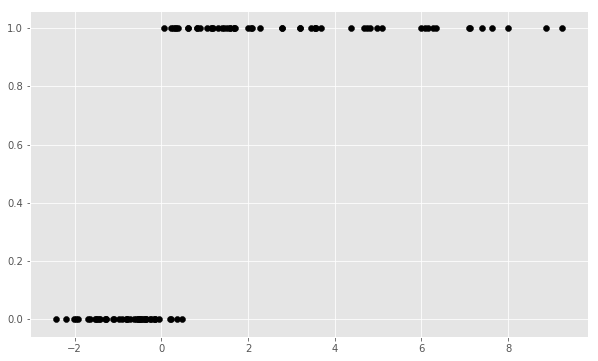

In [9]:
# and plot the result
plt.figure()
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20) 

(300,) (1, 1) (1,) (1, 300)


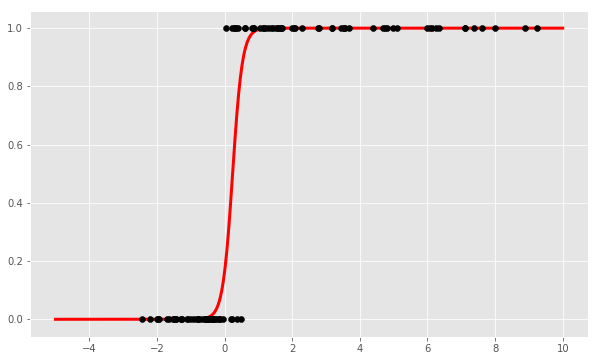

In [10]:
# and plot the result
plt.figure()
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)


X_test = np.linspace(-5, 10, 300)

def model(x):
    return 1 / (1 + np.exp(-x))

print(X_test.shape, clf.coef_.shape, clf.intercept_.shape, (X_test * clf.coef_ + clf.intercept_).shape) 

loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

## Do it again, but with 3 input vectors

In [11]:
# this is our test set, it's just a straight line with some
# Gaussian noise
xmin, xmax = -5, 5
n_samples = 100
n_vectors = 3
np.random.seed(0)
X = np.random.normal(size=(n_samples, n_vectors))
y = (X.mean(axis=1) > 0).astype(int)
X[X > 0] *= 4
X += .3 * np.random.normal(size=(n_samples, n_vectors))


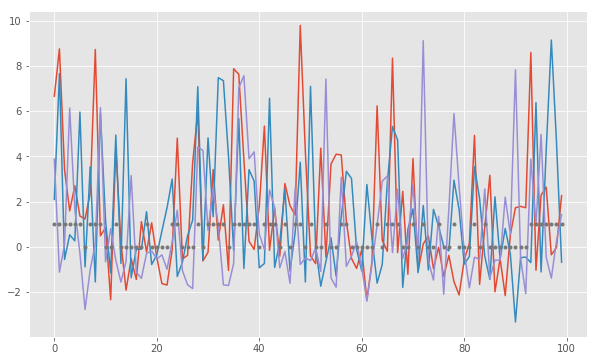

In [12]:
plt.plot(X)
plt.plot(y, '.') 

In [13]:
print(X.shape, y.shape)

(100, 3) (100,)


In [14]:
# run the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y) 

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

(300, 3)


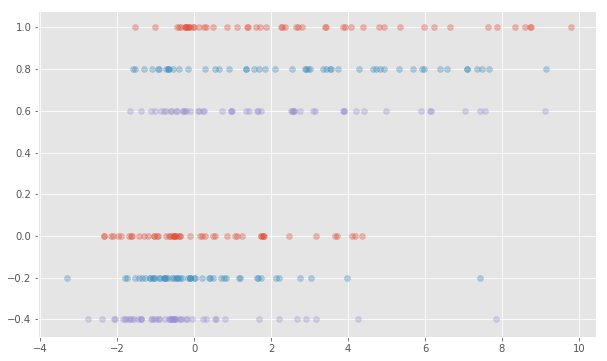

In [15]:
# and plot the result
plt.figure()
plt.clf()
for i in range(n_vectors):
    plt.scatter(X[:, i], y - i/5, zorder=20, alpha=0.35) 
    
    
X_test = np.linspace(-7, 10, 300)[:, np.newaxis] * np.ones((1, 3))

print(X_test.shape)

In [16]:
def getXYcut(loss, X_test, beta):
    """Use linear interpolation to get the relevant values for X, and then compute Y.
    The XY-values are switched on purpose in the call to the interp function, relative to it's documentation.
    The given y (beta) is also computed... it's not needed, in the sense that it's alreaddy determined by the
    input to the function, but it's useful to test the precision of the interpolation."""
    X_cut = np.interp(beta, loss, X_test[:, 0])
    y_cut = model(X_cut*np.ones((1, 3)), clf.coef_, clf.intercept_)
    return np.array([X_cut, y_cut]) 

(300, 3)


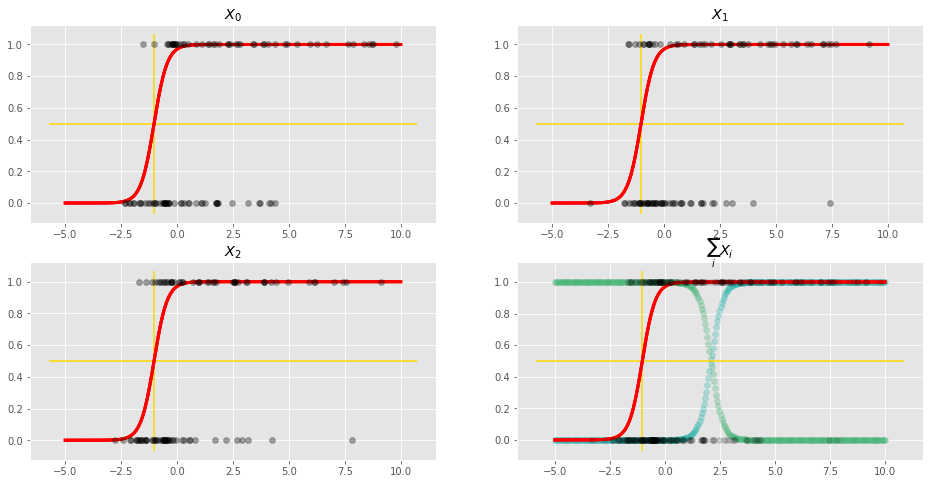

In [17]:
# and plot the result
prob0 = clf.predict_proba(X_test)[:, 0]
prob1 = clf.predict_proba(X_test)[:, 1]

X_test = (np.linspace(-5, 10, 300)[:, np.newaxis] * np.ones((1, 3)))
print(X_test.shape)

def model(x, p, alpha):
    assert p.shape[1] == x.shape[1], "Dimmension mismatch"
    # it's a dot product in the exponent, thus reducing the
    # dimmensions to a vector
    return 1 / (1 + np.exp(-x @ p.T + alpha))  

loss = model(X_test, clf.coef_, clf.intercept_).ravel()

fig, axi = plt.subplots(2, 2, figsize=(16, 8))
axi = axi.flatten() 
beta = 0.5
X_cut, y_cut = getXYcut(loss, X_test, beta)
for i in range(n_vectors):
    axi[i].scatter(X[:, i], y, zorder=20, alpha=0.35, color='k')
    axi[-1].scatter(X[:, i], y, zorder=20, alpha=0.15, color='k')
    axi[i].set_title(f"$X_{i}$")
axi[-1].set_title(r"$\sum_i X_i$")
axi[-1].scatter(X_test[:, 0], prob0, alpha=0.3, color='mediumseagreen')
axi[-1].scatter(X_test[:, 1], prob1, alpha=0.3, color='lightseagreen')
for i in range(n_vectors + 1):
    axi[i].plot(X_test, loss, color='red', linewidth=3, alpha=1)
    axi[i].vlines(X_cut, *axi[i].get_ybound(), color='gold')
    axi[i].hlines(y_cut, *axi[i].get_xbound(), color='gold')


# Play with ROC curves

In [18]:
fpr, tpr, thr = metrics.roc_curve(y, clf.predict_proba(X)[:, 1]) 

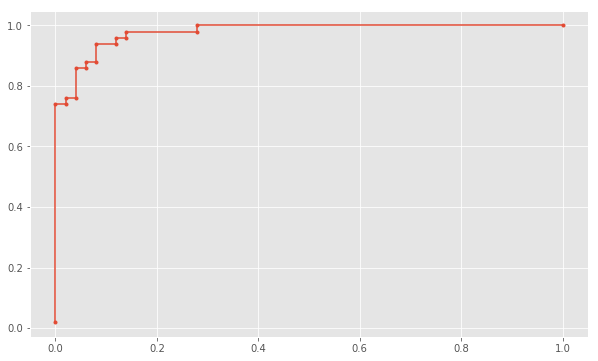

In [19]:
plt.plot(fpr, tpr, '.-')

In [20]:
metrics.roc_auc_score(y, clf.predict_proba(X)[:, 1])

0.9788

In [21]:
metrics.auc(fpr, tpr)

0.9788

In [22]:
threshold = np.linspace(0, 1, 500)
prob0, prob1 = clf.predict_proba(X).T
fpr_lst = list()
tpr_lst = list()
for i, t in enumerate(threshold): 
    fpr, tpr, thr = metrics.roc_curve(y.astype(bool), prob1 > t)
    fpr_lst.append(fpr)
    tpr_lst.append(tpr)

Text(0,0.5,'TPR')

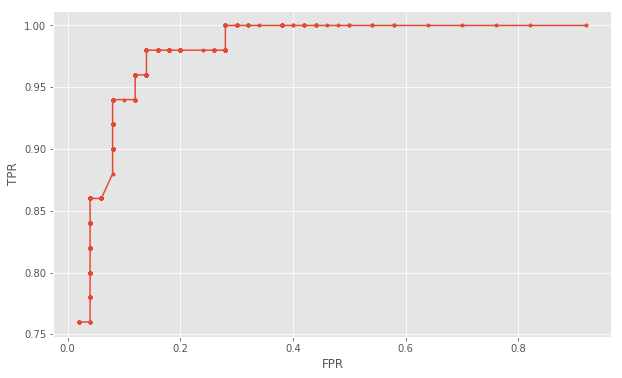

In [23]:
fig, ax = plt.subplots()
ax.plot([el[1] for el in fpr_lst if len(el) == 3], [el[1] for el in tpr_lst if len(el) == 3], '.-')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')

/lscr_paper/allan/miniconda3/envs/py36up/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()


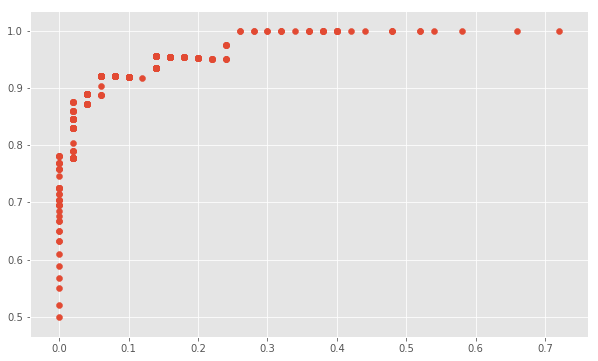

In [24]:
threshold = np.linspace(0, 1, 500)
prob0, prob1 = clf.predict_proba(X).T
fpr = np.NaN*np.zeros_like(threshold)
tpr = np.NaN*np.zeros_like(threshold)
for i, t in enumerate(threshold):
    cm = metrics.confusion_matrix(y, prob1 >= t)
    tp = cm[1, 1]
    tn = cm[0, 0]
    fp = cm[1, 0]
    fn = cm[0, 1]
    tpr[i] = tp/(tp + fn)
    fpr[i] = fp/(fn + tn)

fig, ax = plt.subplots()
ax.scatter(fpr, tpr, linewidths=0.5)

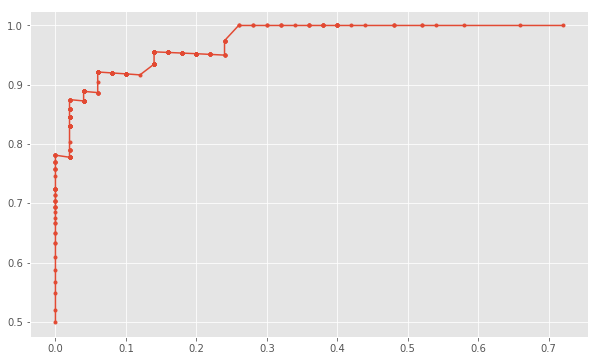

In [25]:
plt.plot(fpr, tpr, '.-')

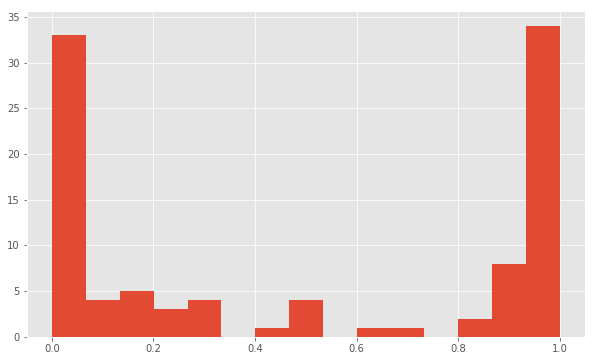

In [26]:
plt.hist(prob1, bins=15);

In [27]:
clf.score(X, y)

0.91

In [28]:
((prob1 > 0.5) == y).mean() 

0.91

In [29]:
cm = metrics.confusion_matrix(y, prob1 >= 0.5)
cm

array([[46,  4],
       [ 5, 45]])

In [30]:
tp = cm[1, 1]
tn = cm[0, 0]
fp = cm[1, 0]
fn = cm[0, 1] 

In [31]:
tpr = tp/(tp + fp)
tpr

0.9

In [32]:
np.allclose(metrics.recall_score(y, prob1 > 0.5), tpr)

True

In [33]:
fpr = fp/(fp + tp)
fpr

0.1

In [34]:
metrics.precision_score(y, prob1 > 0.5)

0.9183673469387755

In [35]:
df = misc.objDir2Df(clf)
df.head() 

,parameter,partype,shape
0,C,float,None
1,_estimator_type,str,10
2,_get_param_names,method,None
3,_predict_proba_lr,method,None
4,class_weight,NoneType,None


In [36]:
df.loc[df.partype == 'ndarray']

,parameter,partype,shape
5,classes_,ndarray,"(2,)"
6,coef_,ndarray,"(1, 3)"
13,intercept_,ndarray,"(1,)"
17,n_iter_,ndarray,"(1,)"


In [37]:
clf.coef_

array([[1.22242331, 1.17990597, 0.98850873]])

In [38]:
clf.intercept_

array([-3.49784314])

In [39]:
X.shape

(100, 3)

In [40]:
y.shape

(100,)

In [41]:
xx = np.linspace(X.min(), X.max(), 100)

In [42]:
yy = clf.coef_ @ X.T + clf.intercept_

In [43]:
yy.shape

(1, 100)

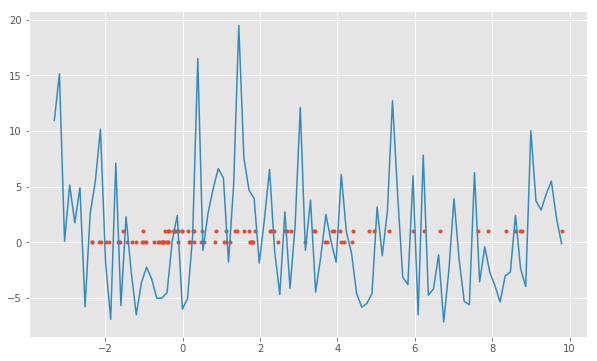

In [44]:
fig, ax = plt.subplots()
ax.plot(X[:, 0], y, '.')
ax.plot(xx, yy.flatten())

In [45]:
import statsmodels.api as sm

In [72]:
def fit_sm_logit(Y, X):
    X = sm.add_constant(X)
    logit_mod = sm.Logit(Y, X)
    logit_res = logit_mod.fit(disp=True)
    return logit_mod, logit_res

In [73]:
logit_mod, logit_res = fit_sm_logit(y, X)

Optimization terminated successfully.
         Current function value: 0.193511
         Iterations 9


In [75]:
logit_res.params

clf.intercept_

clf.coef_

logit_res.bse  # The standard errors of the coefficients

array([-3.49824497,  1.22256968,  1.18004162,  0.98866642])

array([-3.49784314])

array([[1.22242331, 1.17990597, 0.98850873]])

array([0.83022615, 0.30527827, 0.28551235, 0.26485258])

In [76]:
logit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            3
Date:                Mon, 10 Sep 2018   Pseudo R-squ.:                  0.7208
Time:                        16:02:29   Log-Likelihood:                -19.351
converged:                       True   LL-Null:                       -69.315
                                        LLR p-value:                 1.611e-21
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4982      0.830     -4.214      0.000      -5.125      -1.871
x1             1.2226      0.305      4.005      0.000       0.624       1.821
x2             1.1800      0.286      4.133      0.000       0.620       1.740
x3             0.9887      0.265      3.733      0.000       0.470       1.508
==============================================================================
"""

In [78]:
logit_res.summary2() 

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.721     
Dependent Variable: y                AIC:              46.7022   
Date:               2018-09-10 16:02 BIC:              57.1228   
No. Observations:   100              Log-Likelihood:   -19.351   
Df Model:           3                LL-Null:          -69.315   
Df Residuals:       96               LLR p-value:      1.6111e-21
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const     -3.4982     0.8302   -4.2136   0.0000   -5.1255   -1.8710
x1         1.2226     0.3053    4.0048   0.0001    0.6242    1.8209
x2         1.1800     0.2855    4.1331   0.0000    0.6204    1.7396
x3         0.9887     0.2649    3.7329   0.0002    0.4696    1.5078
=================================================================

"""

Based on this answer: https://stats.stackexchange.com/a/228832/20054 

In [82]:
clf.classes_

array([0, 1])

In [89]:
predProbs = np.matrix(clf.predict_proba(X))
X_design = np.hstack([np.ones((X.shape[0], 1)), X]) 

In [93]:
V = np.matrix( np.zeros((X_design.shape[0], X_design.shape[0])) )
np.fill_diagonal(V, np.multiply(predProbs[:,0], predProbs[:,1]).A1)

In [97]:
covLogit = np.linalg.inv(X_design.T * V * X_design) 
print("Covariance Matrix:")
covLogit

Covariance Matrix:


matrix([[ 0.68907049, -0.2067093 , -0.16939937, -0.14875672],
        [-0.2067093 ,  0.09316624,  0.05918761,  0.04804517],
        [-0.16939937,  0.05918761,  0.0814918 ,  0.04302116],
        [-0.14875672,  0.04804517,  0.04302116,  0.07011844]])

In [103]:
print("Standard errors:")
np.sqrt(np.diag(covLogit)) 

Standard errors:


array([0.8301027 , 0.30523146, 0.28546768, 0.26479887])

Same as above, but using Numpy arrays instead of matrices

In [107]:
XX = np.hstack(( np.ones((X.shape[0], 1)), X ))

In [109]:
VV = np.diagflat((np.product(clf.predict_proba(X), axis=1)))

In [120]:
XVX = np.linalg.inv(XX.T @ VV @ XX)
XVX

array([[ 0.68907049, -0.2067093 , -0.16939937, -0.14875672],
       [-0.2067093 ,  0.09316624,  0.05918761,  0.04804517],
       [-0.16939937,  0.05918761,  0.0814918 ,  0.04302116],
       [-0.14875672,  0.04804517,  0.04302116,  0.07011844]])

In [117]:
np.sqrt(np.diag(XVX))

array([0.8301027 , 0.30523146, 0.28546768, 0.26479887])